In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

daily_auckland_weather = pd.read_csv("../AucklandMotatStationNiwa_08June24/motatstation_weather_auckland_2016_2024.csv", index_col='Date', parse_dates=True)
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [3]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [4]:
print(daily_auckland_weather.head())
print(daily_auckland_weather.tail())

            WDir(Deg)  WSpd(m/s)  GustDir(Deg)  GustSpd(m/s)  WindRun(Km)  \
Date                                                                        
2016-03-01      188.0        1.2          65.0           7.2        172.0   
2016-03-02      157.0        3.2          60.0           9.3        258.0   
2016-03-03      134.0        1.9          67.0          10.8        214.0   
2016-03-04      147.0        1.3          38.0           6.2        134.0   
2016-03-05      131.0        0.4         197.0           9.3        187.0   

            Rain(mm)  Tdry(c)  Twet(c)  RH(%)  Tmax(c)  ...  ET10©  ET20©  \
Date                                                    ...                 
2016-03-01       1.8     19.2     18.5   93.0     22.4  ...   21.3   22.2   
2016-03-02       0.0     17.9     16.1   82.0     23.5  ...   20.4   21.7   
2016-03-03       0.0     18.3     15.7   75.0     23.1  ...   19.5   20.9   
2016-03-04       0.0     19.4     16.1   69.0     24.8  ...   19.9   21.2  

In [5]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [6]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [7]:
daily_auckland_weather.isna().sum()

WDir(Deg)          0
WSpd(m/s)          0
GustDir(Deg)       0
GustSpd(m/s)       0
WindRun(Km)        0
Rain(mm)           0
Tdry(c)            0
Twet(c)            0
RH(%)              0
Tmax(c)            0
Tmin(c)            0
Tgmin(C)           0
ET10©              0
ET20©              0
ET100©             0
Pmsl(hPa)          0
Pstn(hPa)          0
Sun(Hrs)           0
Rad(MJ/m2)         0
Tavg               0
Evaporation(mm)    0
SoilMoist(%)       0
dtype: int64

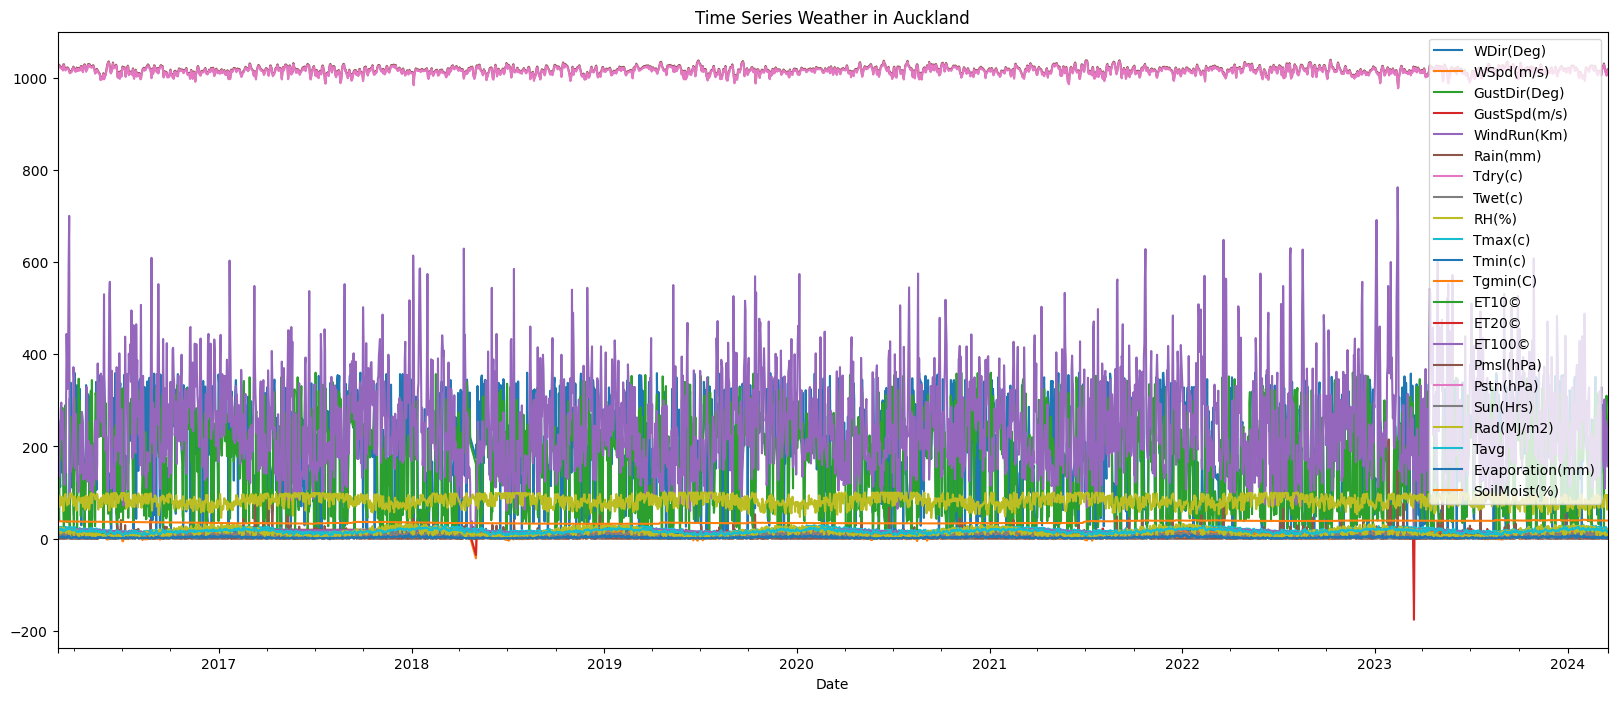

In [8]:
# Visual Inspection to choose between additive and multiplicative method for the Holt-Winters model
import matplotlib.pyplot as plt


daily_auckland_weather.plot(title='Time Series Weather in Auckland', figsize=(20,8))
plt.show()


In [9]:
daily_means  = daily_auckland_weather.resample('D').mean()
monthly_means  = daily_auckland_weather.resample('M').mean()
quater_means = daily_auckland_weather.resample('Q').mean()
annual_means = daily_auckland_weather.resample('A').mean()



C:\Users\Ying\AppData\Local\Temp\ipykernel_14100\3097617961.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means  = daily_auckland_weather.resample('M').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_14100\3097617961.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quater_means = daily_auckland_weather.resample('Q').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_14100\3097617961.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_means = daily_auckland_weather.resample('A').mean()


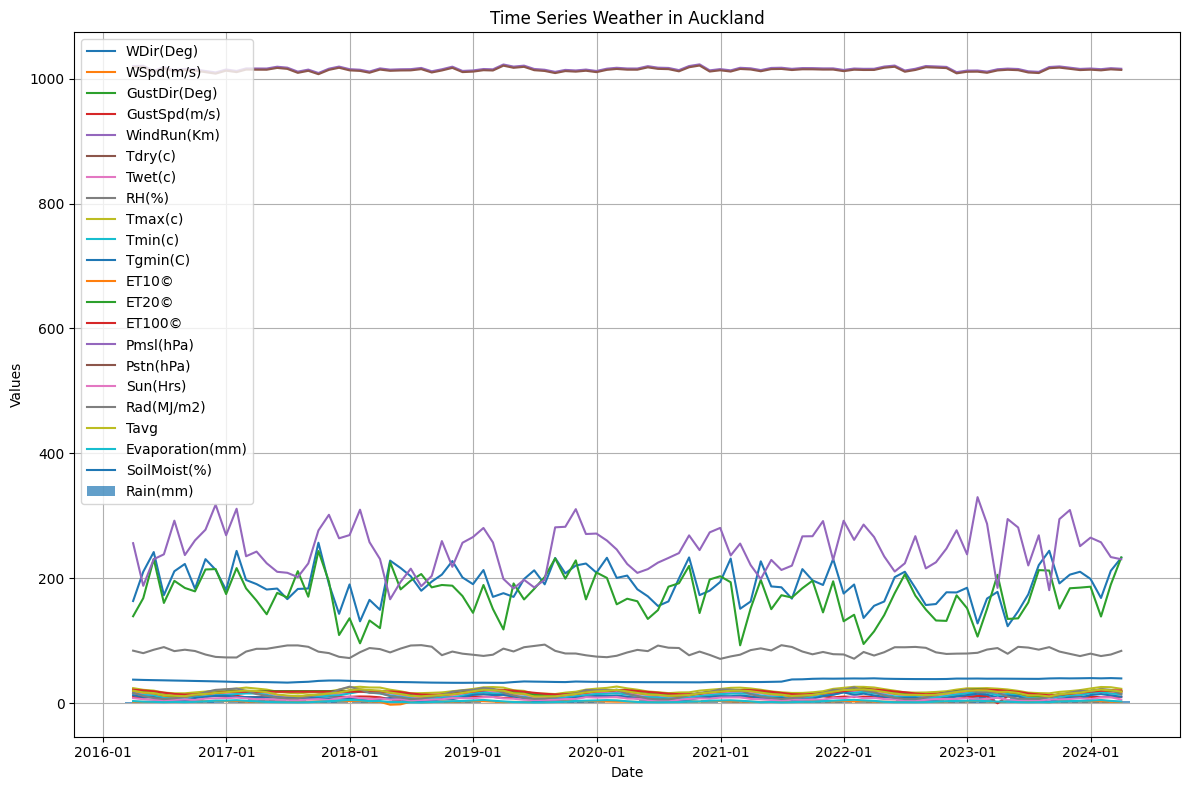

In [10]:
import matplotlib.dates as mdates

high_variable = ['WDir(Deg)', 'WSpd(m/s)','GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)']
plt.figure(figsize=(12, 8))
for column in monthly_means.columns:
    if column == 'Rain(mm)':  # Plot Rainfall as a bar plot
        plt.bar(monthly_means.index, monthly_means[column], width=50, label=column, alpha=0.7)
    elif column == high_variable:  # Plot the identified high variable separately with a different color
        plt.plot(monthly_means.index, monthly_means[column], label=f'{column} (High)', color='red')
    else:
        plt.plot(monthly_means.index, monthly_means[column], label=column)
        
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Time Series Weather in Auckland')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left') 
plt.grid(True)

plt.tight_layout()
plt.show()

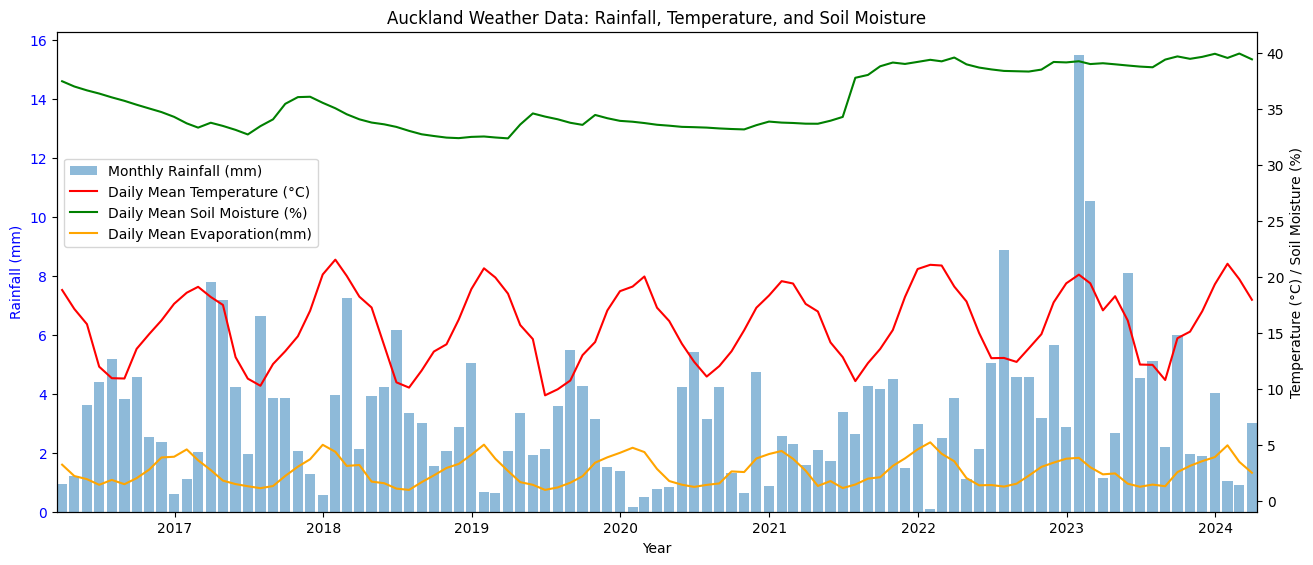

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(monthly_means.index, monthly_means['Rain(mm)'], width=25, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)

ax2 = ax1.twinx()
ax2.plot(monthly_means.index, monthly_means['Tdry(c)'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(monthly_means.index, monthly_means['SoilMoist(%)'], label='Daily Mean Soil Moisture (%)', color='g')
ax2.plot(monthly_means.index, monthly_means['Evaporation(mm)'], label='Daily Mean Evaporation(mm)', color='orange')
ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
# plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

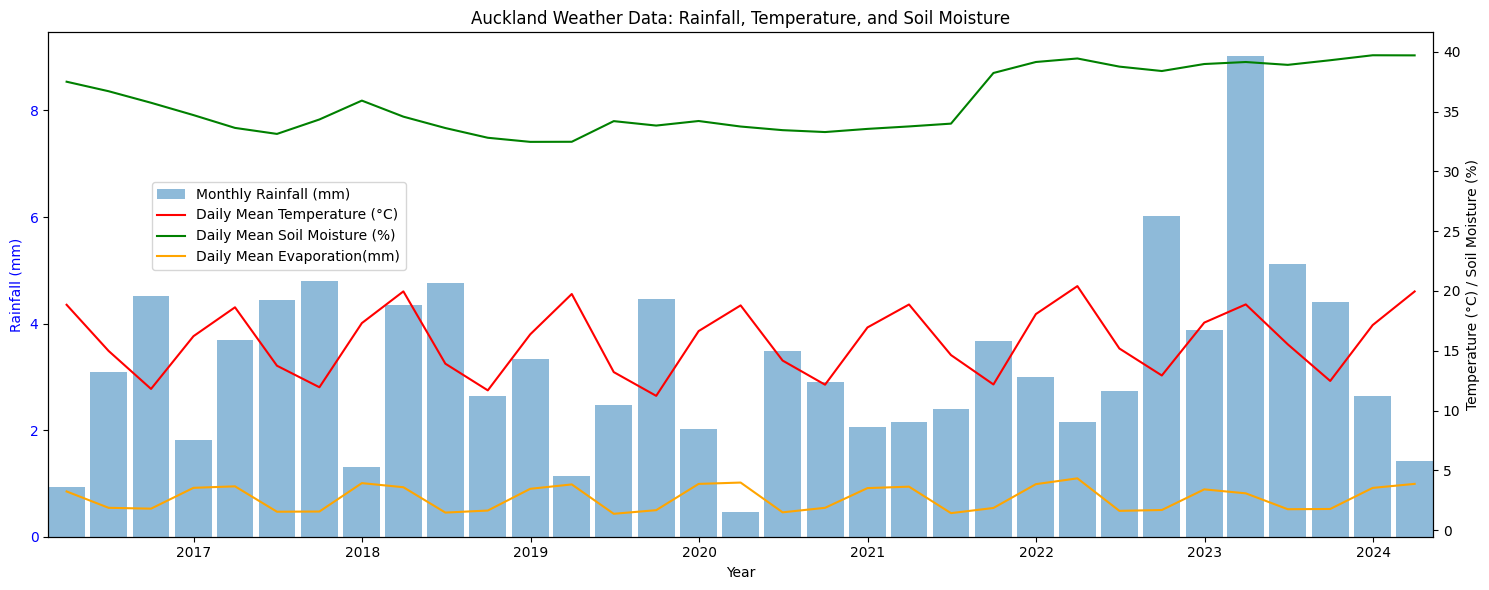

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(quater_means.index, quater_means['Rain(mm)'], width=80, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)
ax2 = ax1.twinx()
ax2.plot(quater_means.index, quater_means['Tdry(c)'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(quater_means.index, quater_means['SoilMoist(%)'], label='Daily Mean Soil Moisture (%)', color='g')
ax2.plot(quater_means.index, quater_means['Evaporation(mm)'], label='Daily Mean Evaporation(mm)', color='orange')

ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()

Basic Forecast Models

In [13]:
daily_auckland_weather.index.freq = 'D'
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [14]:
print("Average WSpd(m/s)", daily_auckland_weather['WSpd(m/s)'].mean())
print("Average WindRun(Km)", daily_auckland_weather['WindRun(Km)'].mean())
print("Average Rain in (mm)", daily_auckland_weather['Rain(mm)'].mean())
print("Average Dry Bulb Temperature", daily_auckland_weather['Tdry(c)'].mean())
print("Average Wet Bulb Temperature", daily_auckland_weather['Twet(c)'].mean())
print("Average Relative Humidity", daily_auckland_weather['RH(%)'].mean())
print("Average Maximum Temperature", daily_auckland_weather['Tmax(c)'].mean())
print("Average Sun(Hrs)", daily_auckland_weather['Sun(Hrs)'].mean())
print("Average Temperature", daily_auckland_weather['Tavg'].mean())
print("Average Soil Moisture", daily_auckland_weather['SoilMoist(%)'].mean())
print("Average Evaporation(mm)", daily_auckland_weather['Evaporation(mm)'].mean())


Average WSpd(m/s) 2.357046614494726
Average WindRun(Km) 246.42480435522288
Average Rain in (mm) 3.307859816264035
Average Dry Bulb Temperature 15.721469887716909
Average Wet Bulb Temperature 14.022735624362028
Average Relative Humidity 82.62884654644436
Average Maximum Temperature 20.307427696495406
Average Sun(Hrs) 6.554610411704662
Average Temperature 16.05307332425995
Average Soil Moisture 35.75471248724055
Average Evaporation(mm) 2.6605988431439265


In [15]:
2939 /100 * 80

2351.2

In [16]:
2939 /100 * 20

587.8

In [17]:
train_data = daily_auckland_weather.iloc[:2470]
test_data = daily_auckland_weather.iloc[2469:]

In [18]:
daily_auckland_weather.columns

Index(['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'SoilMoist(%)'],
      dtype='object')

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

target_variable = 'SoilMoist(%)'

fitted_model = ExponentialSmoothing(train_data[target_variable], trend='mul', seasonal='mul', seasonal_periods=90).fit()


test_predictions = fitted_model.forecast(steps=31)
test_predictions

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2022-12-05    39.188424
2022-12-06    39.181569
2022-12-07    39.178968
2022-12-08    39.188376
2022-12-09    39.200194
2022-12-10    39.201298
2022-12-11    39.199096
2022-12-12    39.229630
2022-12-13    39.253491
2022-12-14    39.313774
2022-12-15    39.330378
2022-12-16    39.317337
2022-12-17    39.273987
2022-12-18    39.263982
2022-12-19    39.284321
2022-12-20    39.353312
2022-12-21    39.363720
2022-12-22    39.374542
2022-12-23    39.375945
2022-12-24    39.412032
2022-12-25    39.421919
2022-12-26    39.436170
2022-12-27    39.508129
2022-12-28    39.527724
2022-12-29    39.530368
2022-12-30    39.542309
2022-12-31    39.564425
2023-01-01    39.602864
2023-01-02    39.582836
2023-01-03    39.575287
2023-01-04    39.583533
Freq: D, dtype: float64

In [20]:
test_predictions.tail()

2022-12-31    39.564425
2023-01-01    39.602864
2023-01-02    39.582836
2023-01-03    39.575287
2023-01-04    39.583533
Freq: D, dtype: float64

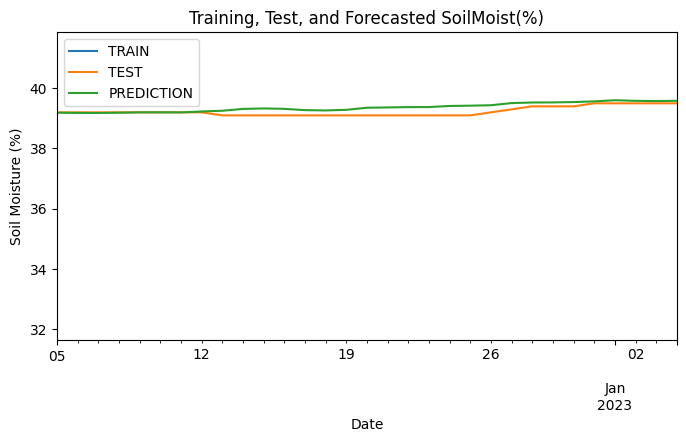

In [21]:
train_size = int(len(daily_auckland_weather) * 0.7)
train_data = daily_auckland_weather.iloc[:train_size]
test_data = daily_auckland_weather.iloc[train_size:]

train_data['SoilMoist(%)'].plot(legend=True, label="TRAIN", figsize=(8, 4))
test_data['SoilMoist(%)'].plot(legend=True, label="TEST")
test_predictions.plot(legend=True, label="PREDICTION", xlim=['2022-12-05', '2023-01-04'])


plt.title('Training, Test, and Forecasted SoilMoist(%)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.show()

In [22]:
final_model = ExponentialSmoothing(daily_auckland_weather['SoilMoist(%)'], trend='mul', seasonal='mul', seasonal_periods=30).fit()

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [23]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Date'>

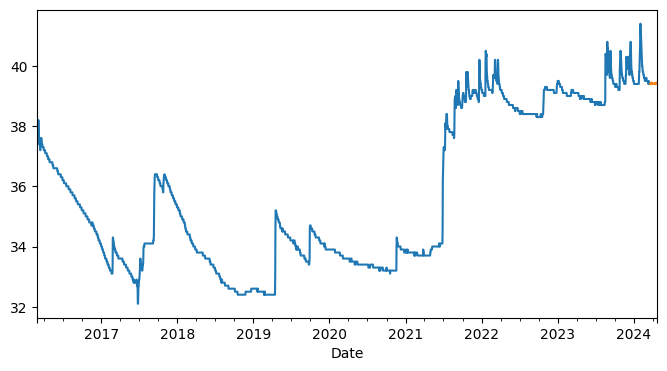

In [24]:
daily_auckland_weather['SoilMoist(%)'].plot(figsize=(8,4))
forecast_predictions.plot()

In [25]:
daily_auckland_weather.columns

Index(['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'SoilMoist(%)'],
      dtype='object')

In [26]:
# Create lag features function
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for lag in lag_days:
            if lag > 0:
                data[f'lag_{col}_{lag}'] = data[col].shift(lag)
    data.dropna(inplace=True)
    return data

subset_columns = ['Rain(mm)']


# Specify columns and lag days
columns_to_lag = [ 'Tdry(c)', 'Rain(mm)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)']
lag_days = range(1, 8)  # Lag days from 1 to 7

# Create lag features
daily_auckland_weather = create_lag_features(daily_auckland_weather, subset_columns, lag_days)


In [27]:
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,Tavg,Evaporation(mm),SoilMoist(%),lag_Rain(mm)_1,lag_Rain(mm)_2,lag_Rain(mm)_3,lag_Rain(mm)_4,lag_Rain(mm)_5,lag_Rain(mm)_6,lag_Rain(mm)_7
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-08,256.0,2.2,263.0,10.8,295.0,0.0,21.3,18.5,75.0,25.5,...,22.20,3.6,37.8,0.0,0.0,0.0,0.0,0.0,0.0,1.8
2016-03-09,208.0,3.8,171.0,9.3,216.0,0.0,19.8,17.3,77.0,23.3,...,20.95,5.3,37.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-10,143.0,0.8,284.0,9.8,277.0,0.0,17.1,16.1,90.0,23.7,...,17.35,4.8,37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-11,274.0,3.3,208.0,9.8,255.0,0.6,21.0,19.7,88.0,23.6,...,20.40,2.9,37.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-12,165.0,1.9,57.0,8.2,218.0,0.0,14.5,10.8,60.0,21.8,...,16.70,1.9,37.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0


Choosing Arima Orders

<Axes: xlabel='Date'>

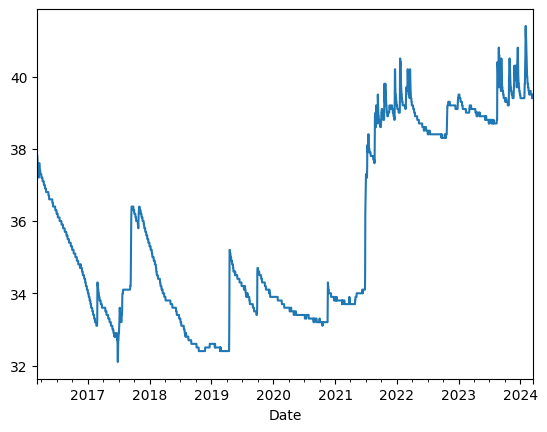

In [28]:
daily_auckland_weather['SoilMoist(%)'].plot()
# look like a stationary data, as they is no train or seasonality

In [29]:
# to calculate if there is a trend
from statsmodels.tsa.statespace.tools import diff
daily_auckland_weather['SoilMoist(%)'] - daily_auckland_weather['SoilMoist(%)'].shift(1)

Date
2016-03-08    NaN
2016-03-09   -0.2
2016-03-10   -0.1
2016-03-11   -0.1
2016-03-12    0.0
             ... 
2024-03-13    0.0
2024-03-14    0.0
2024-03-15    0.0
2024-03-16    0.0
2024-03-17    0.0
Freq: D, Name: SoilMoist(%), Length: 2932, dtype: float64

<Axes: xlabel='Date'>

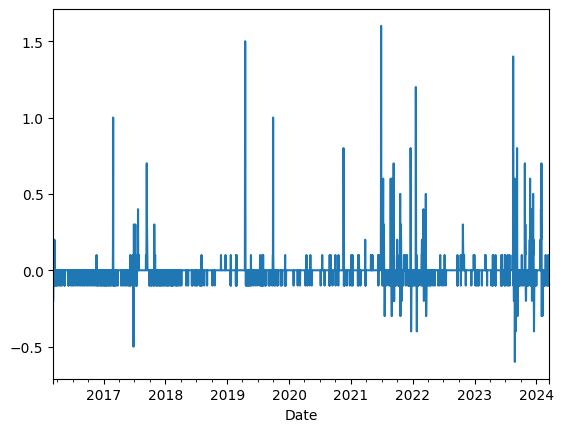

In [30]:
diff(daily_auckland_weather['SoilMoist(%)'], k_diff=1).plot()

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

# to calculate auto correlation
acf(daily_auckland_weather['SoilMoist(%)'])

array([1.        , 0.99877989, 0.99712405, 0.9954351 , 0.99372537,
       0.99204899, 0.99042343, 0.98887434, 0.98743457, 0.98591191,
       0.98433228, 0.98280706, 0.98129877, 0.97977508, 0.97828322,
       0.97674388, 0.97522994, 0.97372345, 0.97218925, 0.97064554,
       0.96914034, 0.96766028, 0.96619561, 0.96474198, 0.9632473 ,
       0.96178109, 0.96031823, 0.95889745, 0.9575321 , 0.95621807,
       0.95490532, 0.95356127, 0.95215384, 0.95075538, 0.94936668])

In [32]:
pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='mle')

array([ 1.00000000e+00,  9.98779894e-01, -1.79285495e-01,  1.80633167e-02,
       -1.05959235e-02,  1.63915368e-02,  1.49407295e-02,  2.49902887e-02,
        3.49479474e-02, -5.06653923e-02, -9.12846124e-03,  2.82669151e-02,
       -4.84124574e-04, -7.27884902e-03,  1.50721718e-02, -2.64982651e-02,
        1.49691996e-02, -1.49203519e-03, -8.22812671e-03, -3.38856873e-03,
        1.50004040e-02,  6.14264995e-03,  2.93363364e-04,  4.09466843e-03,
       -1.94771417e-02,  1.59725781e-02, -3.09445245e-03,  2.14159554e-02,
        1.33691292e-02,  1.40845580e-02, -7.30075726e-03])

In [33]:
pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='mle')

array([ 1.00000000e+00,  9.98779894e-01, -1.79285495e-01,  1.80633167e-02,
       -1.05959235e-02,  1.63915368e-02,  1.49407295e-02,  2.49902887e-02,
        3.49479474e-02, -5.06653923e-02, -9.12846124e-03,  2.82669151e-02,
       -4.84124574e-04, -7.27884902e-03,  1.50721718e-02, -2.64982651e-02,
        1.49691996e-02, -1.49203519e-03, -8.22812671e-03, -3.38856873e-03,
        1.50004040e-02,  6.14264995e-03,  2.93363364e-04,  4.09466843e-03,
       -1.94771417e-02,  1.59725781e-02, -3.09445245e-03,  2.14159554e-02,
        1.33691292e-02,  1.40845580e-02, -7.30075726e-03])

In [34]:
# pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='unbiased')

In [35]:
pacf_ols(daily_auckland_weather['SoilMoist(%)'], nlags=30)

array([ 1.        ,  0.9994634 , -0.29697577,  0.06465429, -0.03458854,
        0.03921708,  0.01488432,  0.0451776 ,  0.02348636, -0.05441706,
        0.00255292,  0.04489038, -0.01002638, -0.00811614,  0.02791524,
       -0.06007192,  0.0409888 ,  0.00169528, -0.01735703, -0.0091215 ,
        0.03174366,  0.00170189,  0.00128421, -0.00696986, -0.02284998,
        0.02132228,  0.00654591,  0.03480566,  0.01064277,  0.02176111,
       -0.0055675 ])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

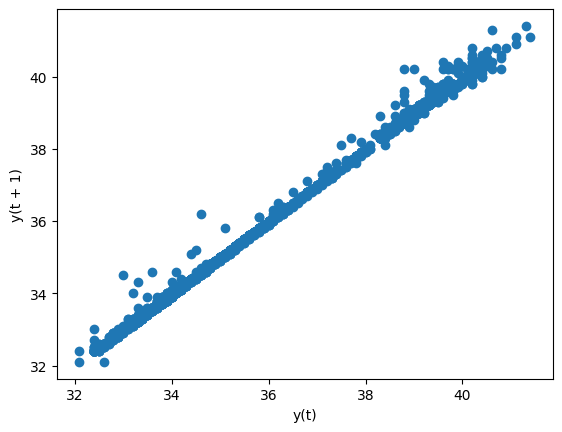

In [36]:
from pandas.plotting import lag_plot
lag_plot(daily_auckland_weather['SoilMoist(%)'])
# ths show very strong of auto correlation --> non stationery dataset

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

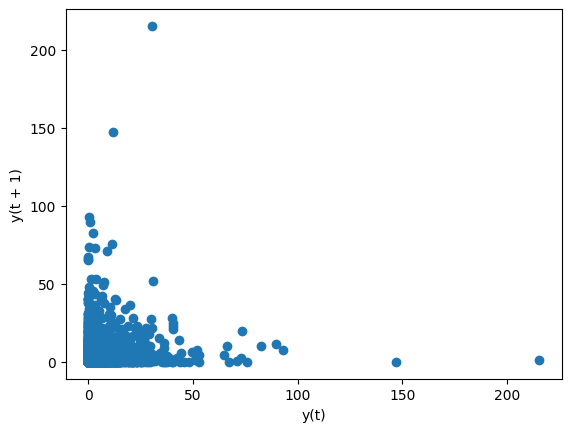

In [37]:
lag_plot(daily_auckland_weather['Rain(mm)'])


In [38]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [39]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [40]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_P=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5384.276, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5105.868, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5373.757, Time=2.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5389.219, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5107.782, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5387.807, Time=4.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5387.693, Time=5.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5385.220, Time=7.94 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5391.168, Time=1.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5389.759, Time=4.88 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5389.644, Time=2.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5375.716, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5387.170, Time=2.58 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 40.675 seconds


In [41]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2932
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2697.584
Date:                Sat, 29 Jun 2024   AIC                          -5391.168
Time:                        01:55:12   BIC                          -5379.202
Sample:                    03-08-2016   HQIC                         -5386.859
                         - 03-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3159      0.006     50.918      0.000       0.304       0.328
sigma2         0.0093   4.43e-05    209.612      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            642625.57
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.78   Skew:                             5.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_P=0, start_q=0, max_p=6, max_q=3, seasonal=True, trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5384.276, Time=4.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5105.868, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5373.757, Time=2.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5389.219, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5107.782, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5387.807, Time=5.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5387.693, Time=4.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5385.220, Time=8.88 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5391.168, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5389.759, Time=6.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5389.644, Time=2.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5375.716, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5387.170, Time=2.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 39.444 seconds


In [43]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2932
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2697.584
Date:                Sat, 29 Jun 2024   AIC                          -5391.168
Time:                        01:55:52   BIC                          -5379.202
Sample:                    03-08-2016   HQIC                         -5386.859
                         - 03-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3159      0.006     50.918      0.000       0.304       0.328
sigma2         0.0093   4.43e-05    209.612      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            642625.57
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.78   Skew:                             5.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_p=0, start_q=0, max_p=0,max_q=4, seasonal=True, trace=True, m=14)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[14] intercept   : AIC=-5107.062, Time=26.13 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=-5105.868, Time=1.63 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AIC=-5108.024, Time=5.72 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=-5397.157, Time=16.56 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=-5107.782, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[14] intercept   : AIC=-5389.219, Time=5.99 sec
 ARIMA(0,1,1)(1,0,1)[14] intercept   : AIC=-5395.621, Time=62.90 sec
 ARIMA(0,1,1)(0,0,2)[14] intercept   : AIC=-5396.271, Time=50.14 sec
 ARIMA(0,1,1)(1,0,0)[14] intercept   : AIC=-5396.680, Time=14.71 sec
 ARIMA(0,1,1)(1,0,2)[14] intercept   : AIC=-5394.412, Time=46.82 sec
 ARIMA(0,1,0)(0,0,1)[14] intercept   : AIC=-5108.312, Time=5.09 sec
 ARIMA(0,1,2)(0,0,1)[14] intercept   : AIC=-5395.692, Time=25.29 sec
 ARIMA(0,1,1)(0,0,1)[14]             : AIC=-5399.113, Time=12.98 sec
 ARIMA(0,1,1)(0,0,0)[14]             : AIC=-5391.168, Time=4.15 s

In [45]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2932
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 14)   Log Likelihood                2702.557
Date:                            Sat, 29 Jun 2024   AIC                          -5399.113
Time:                                    02:02:56   BIC                          -5381.164
Sample:                                03-08-2016   HQIC                         -5392.649
                                     - 03-17-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3195      0.006     51.426      0.000       0.307       0.332
ma.S.L14       0.0597      0.013      4.625      0.000       0.034       0.085
sigma2         0.0093   4.45e-05    207.849      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            642588.12
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                             5.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the ARIMA(0,1,1)(1,0,1)[30] Model has the lowest AIC among the three tested models

In [46]:
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,Tavg,Evaporation(mm),SoilMoist(%),lag_Rain(mm)_1,lag_Rain(mm)_2,lag_Rain(mm)_3,lag_Rain(mm)_4,lag_Rain(mm)_5,lag_Rain(mm)_6,lag_Rain(mm)_7
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-08,256.0,2.2,263.0,10.8,295.0,0.0,21.3,18.5,75.0,25.5,...,22.20,3.6,37.8,0.0,0.0,0.0,0.0,0.0,0.0,1.8
2016-03-09,208.0,3.8,171.0,9.3,216.0,0.0,19.8,17.3,77.0,23.3,...,20.95,5.3,37.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-10,143.0,0.8,284.0,9.8,277.0,0.0,17.1,16.1,90.0,23.7,...,17.35,4.8,37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-11,274.0,3.3,208.0,9.8,255.0,0.6,21.0,19.7,88.0,23.6,...,20.40,2.9,37.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-12,165.0,1.9,57.0,8.2,218.0,0.0,14.5,10.8,60.0,21.8,...,16.70,1.9,37.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0


# ARMA

<Axes: xlabel='Date'>

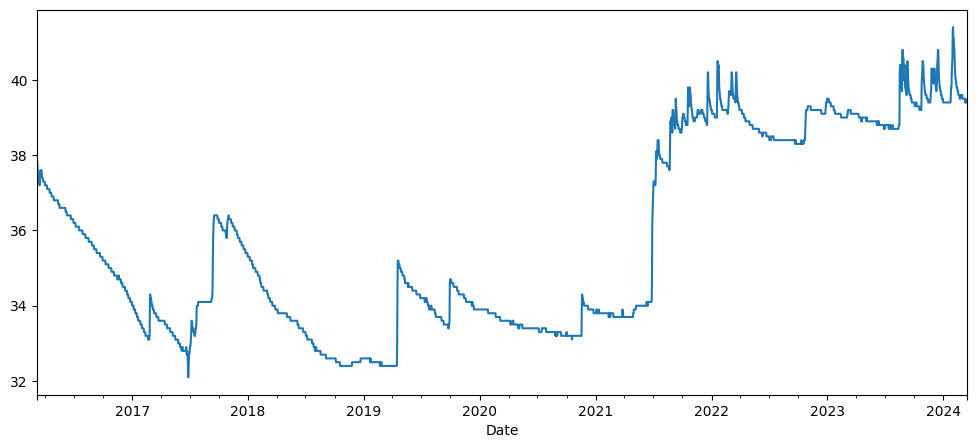

In [47]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# to determind to look for p and q
daily_auckland_weather['SoilMoist(%)'].plot(figsize=(12,5))

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['AD test statistic', 'p-value', '#lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no uni root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to Reject the null hypothesis")
        print("Data has no uni root and is non-stationary")

In [49]:
adf_test(daily_auckland_weather['SoilMoist(%)'])

Augmented Dickey-Fuller Test: 
AD test statistic         -0.928270
p-value                    0.778520
#lags used                15.000000
# observations          2916.000000
critical value (1%)       -3.432595
critical value (5%)       -2.862532
critical value (10%)      -2.567298
Weak evidence against the null hypothesis
Fail to Reject the null hypothesis
Data has no uni root and is non-stationary


In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_size = int(len(daily_auckland_weather) * 0.8)

train, test = daily_auckland_weather['SoilMoist(%)'][:train_size], daily_auckland_weather['SoilMoist(%)'][train_size:]
model = ARIMA(train, order=(0, 1, 1)) 
results = model.fit()

forecast = results.forecast(steps=len(test))


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 0.9782385170526562
Mean Absolute Error (MAE): 0.8151618398605995
Mean Squared Error (MSE): 0.9569505962453799
R2 Score: -2.1244700485673804


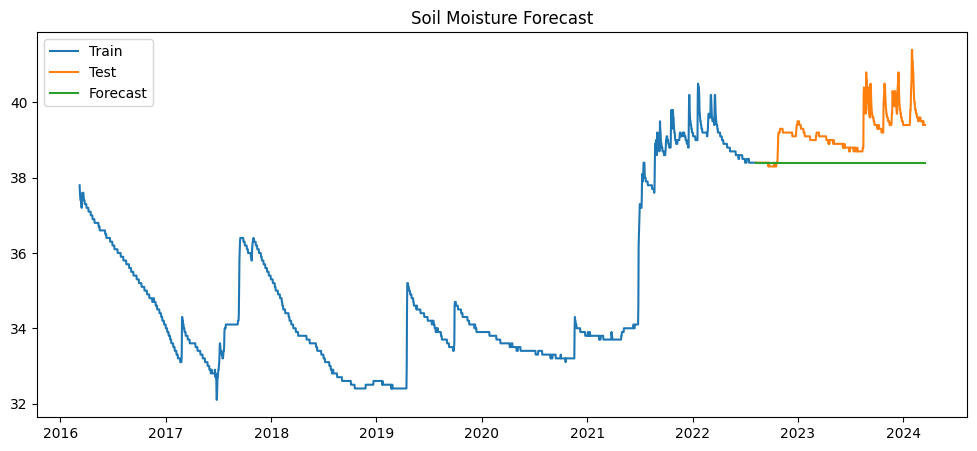

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast')
plt.show()

SARIMA RMSE: 0.9781849428564414
SARIMA Mean Absolute Error (MAE): 0.8151618398605995
SARIMA Mean Squared Error (MSE): 0.9569505962453799
SARIMA R2 Score: -2.1244700485673804


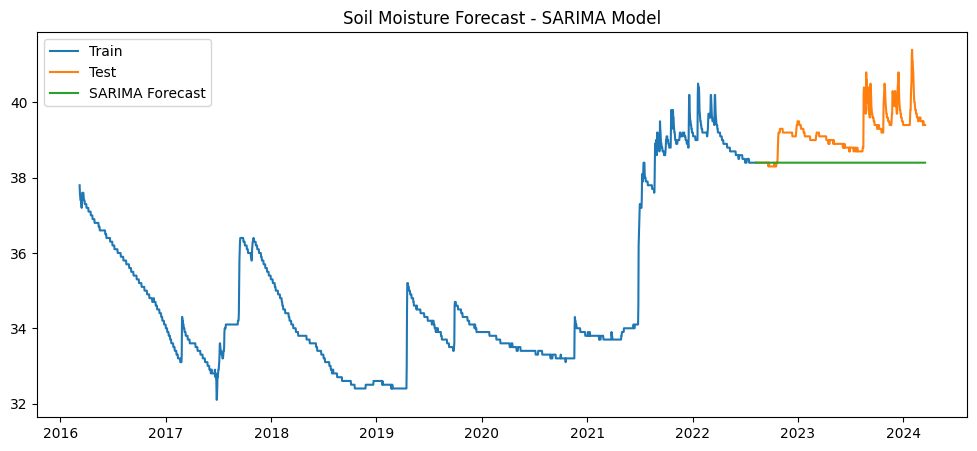

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 0, 1, 14))
results_sarima = model_sarima.fit()

forecast_sarima = results_sarima.forecast(steps=len(test))
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
mae_sarima = mean_absolute_error(test, forecast)
mse_sarima = mean_squared_error(test, forecast)
r2_sarima = r2_score(test, forecast)
print(f"SARIMA RMSE: {rmse_sarima}")
print("SARIMA Mean Absolute Error (MAE):", mae_sarima)
print("SARIMA Mean Squared Error (MSE):", mse_sarima)
print("SARIMA R2 Score:", r2_sarima)


plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast - SARIMA Model')
plt.show()

In [53]:
forecast_sarima['Date'] = test.index

monthly_median_soil_moisture = forecast_sarima.groupby(forecast_sarima['Date'].dt.month)['SoilMoist(%)'].median()
def categorize_soil_moisture_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"
    
forecast_sarima['moisture_percentage'] = (forecast_sarima['SoilMoist(%)'] / monthly_median_soil_moisture[forecast_sarima['Date'].dt.month].values) * 100
forecast_sarima['soil_moisture_condition'] = forecast_sarima['moisture_percentage'].apply(categorize_soil_moisture_condition)
print(forecast_sarima[['Date', 'SoilMoist(%)', 'moisture_percentage', 'soil_moisture_condition']])


AttributeError: 'DatetimeIndex' object has no attribute 'dt'